In [3]:
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

In [14]:
train_dataset = load_dataset("sayakpaul/nyu_depth_v2", split="validation")

In [15]:
train_dataset.save_to_disk("../data/test")

Saving the dataset (0/3 shards):   0%|          | 0/654 [00:00<?, ? examples/s]

In [5]:
train_dataset

Dataset({
    features: ['image', 'depth_map'],
    num_rows: 47584
})

In [8]:
index = 300

In [9]:
example = train_dataset[index]

In [10]:
image = example["image"]

In [11]:
depth = example["depth_map"]

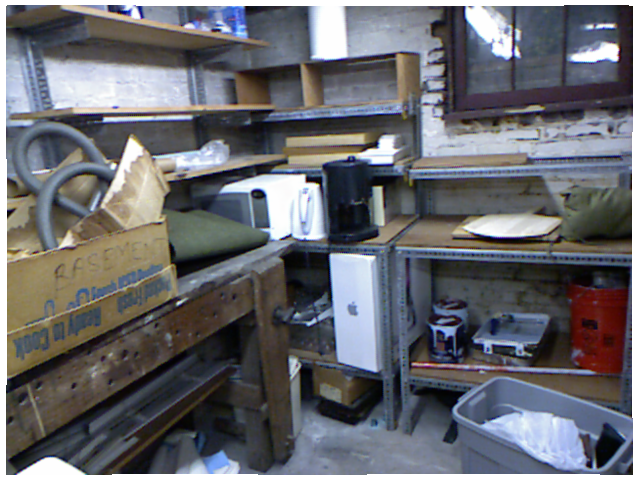

In [12]:
image

In [13]:
depth

<PIL.TiffImagePlugin.TiffImageFile image mode=F size=640x480>

In [86]:
def relative_depthmap(depth, d_min=None, d_max=None):
    if d_min is None:
        d_min = np.min(depth)
    if d_max is None:
        d_max = np.max(depth)

    depth_relative = (np.array(depth, dtype=np.float32) - d_min) / (d_max - d_min)

    return depth_relative

In [93]:
arrdepth = relative_depthmap(depth)
arrdepth.shape

(480, 640)

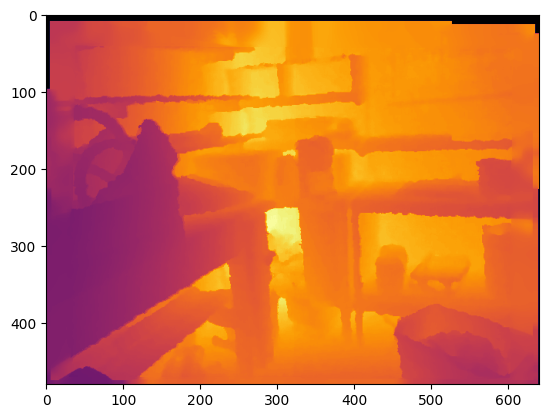

In [96]:
plt.imshow(arrdepth, cmap=plt.cm.inferno)